# Homework 2

## Author: Marusic Diana (331)

**TODO:** You  should  state  and  describe  the  problem  you  are  trying  to  solve.  Describe  thedata  (type  of  data,  summary  statistics),  the  desired  output,  and  the  proposed  model.

### Import files 

In [5]:
# Some IPython magic
# Put these at the top of every notebook, here nbagg is used for interactive plots
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score


# Check python version
# import sys
# print(sys.version)
# print(sys.version_info)

## Task 1: Text classification (by authors)

**TODO:**

- use SVM Classifier(SVC) to predict author. 

 * hyperparameters:  (kernel,  C,  gamma) 
 
 
- apply PCA to reduce dimensionality and retrain

**TODO:** remove __ and other symbols from text

### Read data

In [6]:
FILE_NAME = "Marusic I Diana.csv"
dataset = pd.read_csv(FILE_NAME)

### Visualize data

In [7]:
dataset.head()
# print(dataset)

,Unnamed: 0,Sir Arthur Conan Doyle,Sir Walter Scott,Louisa May Alcott,Edmund Burke,Daniel Defoe,John Ruskin,Rudyard Kipling,Nathaniel Hawthorne,William Makepeace Thackeray,...,Edward Phillips Oppenheim,P G Wodehouse,Jack London,Jacob Abbott,Andrew Lang,Herbert George Wells,Thomas Carlyle,Joseph Conrad,Henry Rider Haggard,Frank Richard Stockton
0,0,efforts of old Gilray in the interests of law ...,"wood or stone, but only as emblems of the holy...","of penitence and thankfulness. ""Call them now...",formerly received from the Vizier. _But a copy...,"musket, I sat down myself to load all the rest...",a stone-mason's yard; and its rooms whitewashe...,once with a Bank of England director; wish I'd...,commander-in-chief of all the British forces i...,hard-heartedness in order to try those people ...,...,"say, I should have expected to have found her ...",Mr. Peters? Don't you think there is danger he...,warmer. Buck was wildly glad. He knew he was a...,"danger that they were often exposed to, that s...",think that the Achaeans were the Aryan conquer...,EXPERIMENTS; OF GRAND MONARCHY ...,"changes in our notions, informations, in our r...",Wretched old Allang went nearly mad with appre...,"stood by the open door, Martin, a helmet from ...","growing twilight of her happiness, and one was..."
1,1,of accepting the inevitable. A flat Arab loaf...,"was burned alive. Her name was Alison Pearson,...","and there was no time to ask leave, but it was...",for traders and manufacturers of every denomin...,"substantial Matter, which tho' it is full of S...","instance, the Gothic foliage, of which one ess...",way. _Time_: The edge of sunset. Single room i...,"feeling of an intruder, I walked towards Goat ...","out blaggerd names at you, and takes his pewny...",...,the blowing away of the window was merely a ru...,"cereal and a shirred egg? Now, for the love of...",might well hint to them that their bedtime had...,strange refusal could mean. Although James th...,watched the date tree till the cocks were crow...,went into my study and wrote down everything a...,"the Nightmares shall, to all time, be welcome ...",find for it a pedigree of distinguished ancest...,it must be supreme. For this ornament was noth...,"continued, often with great earnestness and he..."
2,2,Commons with an energy of hatred that one woul...,"the assertion, that a king might take a lesson...","locks powdered the dark ones. ""A heavenly wal...",honorable and advantageous to the India Compan...,"would not accept of it alone, but would have m...",God. To these alone we have to look; in these ...,"them. ""Fitz is right. I'm dead; only I don't s...","suppose, and in the winter and spring it will ...","those of Parson Thwackum, or Miss Seagrim. But...",...,"you, wouldn't it?"" Philip remarked. ""Five hun...",more about your unfortunate affair with that g...,"were iron. They were perceivers, willers, and...",Bothwell's intrigues.--Desperate schemes attri...,said to his son: 'Now that we own such a sple...,"of dark walls reflecting lamplight, and the my...","regular steps; then a friendly knocking: ""We a...","all black in the pale wall, stood open as he h...",gate of the kraal. But then her strength left ...,"but that simple-minded dependant and relative,..."
3,3,to breathe. There it was again! And again! Now...,I have this day learned more of Duke Charles t...,"let us help you if we can. Are you ill, in wan...","understand, to be sure, that I speak of Charle...","the slip both together, and never heard more o...","issue is not understood by the people, and the...","twisted into knots, riven with rents and diamo...",in a religious calm; recollections of many a h...,papa. I am Number 46 in the Exhibition of the ...,...,making that speech he had departed a great dea...,person who thanked goodness that he was not al...,"in it. But Carmack, the squaw-man! And Skooku...","revolve by the machinery. The axle, thus revol...",truth there may be in Saint-Germain's travels ...,Teddy! Poor old A

Dataset contains samples  of  text  from  20 different  authors and one useless column (Unnamed:0).  Each sample  has  50.000  characters  and  there  are  20  samples  for  each  author.

In [8]:
print(dataset.columns)

Index(['Unnamed: 0', 'Sir Arthur Conan Doyle', 'Sir Walter Scott',
       'Louisa May Alcott', 'Edmund Burke', 'Daniel Defoe', 'John Ruskin',
       'Rudyard Kipling', 'Nathaniel Hawthorne', 'William Makepeace Thackeray',
       'Lord Byron', 'Edward Phillips Oppenheim', 'P G Wodehouse',
       'Jack London', 'Jacob Abbott', 'Andrew Lang', 'Herbert George Wells',
       'Thomas Carlyle', 'Joseph Conrad', 'Henry Rider Haggard',
       'Frank Richard Stockton'],
      dtype='object')


### Drop unused column ('Unnamed: 0')

In [9]:
dataset = dataset.drop('Unnamed: 0', axis=1)

In [10]:
dataset.head()


,Sir Arthur Conan Doyle,Sir Walter Scott,Louisa May Alcott,Edmund Burke,Daniel Defoe,John Ruskin,Rudyard Kipling,Nathaniel Hawthorne,William Makepeace Thackeray,Lord Byron,Edward Phillips Oppenheim,P G Wodehouse,Jack London,Jacob Abbott,Andrew Lang,Herbert George Wells,Thomas Carlyle,Joseph Conrad,Henry Rider Haggard,Frank Richard Stockton
0,efforts of old Gilray in the interests of law ...,"wood or stone, but only as emblems of the holy...","of penitence and thankfulness. ""Call them now...",formerly received from the Vizier. _But a copy...,"musket, I sat down myself to load all the rest...",a stone-mason's yard; and its rooms whitewashe...,once with a Bank of England director; wish I'd...,commander-in-chief of all the British forces i...,hard-heartedness in order to try those people ...,metaphor.] [387] {335} The answer of the moth...,"say, I should have expected to have found her ...",Mr. Peters? Don't you think there is danger he...,warmer. Buck was wildly glad. He knew he was a...,"danger that they were often exposed to, that s...",think that the Achaeans were the Aryan conquer...,EXPERIMENTS; OF GRAND MONARCHY ...,"changes in our notions, informations, in our r...",Wretched old Allang went nearly mad with appre...,"stood by the open door, Martin, a helmet from ...","growing twilight of her happiness, and one was..."
1,of accepting the inevitable. A flat Arab loaf...,"was burned alive. Her name was Alison Pearson,...","and there was no time to ask leave, but it was...",for traders and manufacturers of every denomin...,"substantial Matter, which tho' it is full of S...","instance, the Gothic foliage, of which one ess...",way. _Time_: The edge of sunset. Single room i...,"feeling of an intruder, I walked towards Goat ...","out blaggerd names at you, and takes his pewny...","THE WORKS OF LORD BYRON. A NEW, REVI...",the blowing away of the window was merely a ru...,"cereal and a shirred egg? Now, for the love of...",might well hint to them that their bedtime had...,strange refusal could mean. Although James th...,watched the date tree till the cocks were crow...,went into my study and wrote down everything a...,"the Nightmares shall, to all time, be welcome ...",find for it a pedigree of distinguished ancest...,it must be supreme. For this ornament was noth...,"continued, often with great earnestness and he..."
2,Commons with an energy of hatred that one woul...,"the assertion, that a king might take a lesson...","locks powdered the dark ones. ""A heavenly wal...",honorable and advantageous to the India Compan...,"would not accept of it alone, but would have m...",God. To these alone we have to look; in these ...,"them. ""Fitz is right. I'm dead; only I don't s...","suppose, and in the winter and spring it will ...","those of Parson Thwackum, or Miss Seagrim. But...",scrubby paper to write on--excuse it. I am cer...,"you, wouldn't it?"" Philip remarked. ""Five hun...",more about your unfortunate affair with that g...,"were iron. They were perceivers, willers, and...",Bothwell's intrigues.--Desperate schemes attri...,said to his son: 'Now that we own such a sple...,"of dark walls reflecting lamplight, and the my...","regular steps; then a friendly knocking: ""We a...","all black in the pale wall, stood open as he h...",gate of the kraal. But then her strength left ...,"but that simple-minded dependant and relative,..."
3,to breathe. There it was again! And again! Now...,I have this day learned more of Duke Charles t...,"let us help you if we can. Are you ill, in wan...","understand, to be sure, that I speak of Charle...","the slip both together, and never heard more o...","issue is not understood by the people, and the...","twisted into knots, riven with rents and diamo...",in a religious calm; recollections of many a h...,papa. I am Number 46 in the Exhibition of the ...,marble where her feet ...,making that speech he had departed a great dea...,person who thanked goodness that he was not al...,"in it. But Carmack, the squaw-

In [11]:
for i in range(0, len(dataset)):
    print("Author:" + dataset.iloc[:,i].name)
    print(dataset.iloc[:,i])
    print("i=", i+1)
    print()

Author:Sir Arthur Conan Doyle
0     efforts of old Gilray in the interests of law ...
1     of accepting the inevitable.  A flat Arab loaf...
2     Commons with an energy of hatred that one woul...
3     to breathe. There it was again! And again! Now...
4     chair, he brewed himself a glass of grog, in w...
5     places, I had forgotten about that spot upon t...
6     rather complex, and therefore interesting.  Hi...
7     wanting When the farmer comes to count them in...
8     vituperation.  In one of his outbursts he thre...
9     fact that in the year 1865 a picture by Greuze...
10    in the country. They would suffice to break of...
11    Averroes?"  "No, I have not.  But the appointm...
12    foraging parties which had never returned.  Th...
13    them to the light as he did so. He was clearly...
14    one great brown wrinkled cliff succeeding anot...
15    best."  "I perceive," said the prince, "that y...
16    by immigrants who are far more highly educated...
17    the Royal st

0     say, I should have expected to have found her ...
1     the blowing away of the window was merely a ru...
2     you, wouldn't it?" Philip remarked.  "Five hun...
3     making that speech he had departed a great dea...
4     read a little more of the New Testament and a ...
5     smiled quietly. She was content to let him esc...
6     a beautiful setting, you know."  "The people w...
7     simple answer: What are your views as to Woman...
8     with the plowman by his side, but without any ...
9     grimly.  "Got you into a kind of hornets' nest...
10    many, Prince," she said softly, "who will be s...
11    it."  He was already dragging his companion do...
12    out of the back of the house, carrying their w...
13     THE DEVIL'S PAW  By E. Phillips Oppenheim    ...
14    private assignation of my own. Since then even...
15    leaned forward in her chair, gazing steadily i...
16    "except this--that you speak the truth."  He w...
17    drew his revolver and advanced into the ce

### Create dataset of texts

In [12]:
data = []
for i in range(0, len(dataset)):
    print("Author:" + dataset.iloc[:,i].name)
    print(dataset.iloc[:,i])
    print("i=", i+1)
    print()

Author:Sir Arthur Conan Doyle
0     efforts of old Gilray in the interests of law ...
1     of accepting the inevitable.  A flat Arab loaf...
2     Commons with an energy of hatred that one woul...
3     to breathe. There it was again! And again! Now...
4     chair, he brewed himself a glass of grog, in w...
5     places, I had forgotten about that spot upon t...
6     rather complex, and therefore interesting.  Hi...
7     wanting When the farmer comes to count them in...
8     vituperation.  In one of his outbursts he thre...
9     fact that in the year 1865 a picture by Greuze...
10    in the country. They would suffice to break of...
11    Averroes?"  "No, I have not.  But the appointm...
12    foraging parties which had never returned.  Th...
13    them to the light as he did so. He was clearly...
14    one great brown wrinkled cliff succeeding anot...
15    best."  "I perceive," said the prince, "that y...
16    by immigrants who are far more highly educated...
17    the Royal st

0     say, I should have expected to have found her ...
1     the blowing away of the window was merely a ru...
2     you, wouldn't it?" Philip remarked.  "Five hun...
3     making that speech he had departed a great dea...
4     read a little more of the New Testament and a ...
5     smiled quietly. She was content to let him esc...
6     a beautiful setting, you know."  "The people w...
7     simple answer: What are your views as to Woman...
8     with the plowman by his side, but without any ...
9     grimly.  "Got you into a kind of hornets' nest...
10    many, Prince," she said softly, "who will be s...
11    it."  He was already dragging his companion do...
12    out of the back of the house, carrying their w...
13     THE DEVIL'S PAW  By E. Phillips Oppenheim    ...
14    private assignation of my own. Since then even...
15    leaned forward in her chair, gazing steadily i...
16    "except this--that you speak the truth."  He w...
17    drew his revolver and advanced into the ce

### Remove useless characters

In [13]:
dataset.replace("_", "")

,Sir Arthur Conan Doyle,Sir Walter Scott,Louisa May Alcott,Edmund Burke,Daniel Defoe,John Ruskin,Rudyard Kipling,Nathaniel Hawthorne,William Makepeace Thackeray,Lord Byron,Edward Phillips Oppenheim,P G Wodehouse,Jack London,Jacob Abbott,Andrew Lang,Herbert George Wells,Thomas Carlyle,Joseph Conrad,Henry Rider Haggard,Frank Richard Stockton
0,efforts of old Gilray in the interests of law ...,"wood or stone, but only as emblems of the holy...","of penitence and thankfulness. ""Call them now...",formerly received from the Vizier. _But a copy...,"musket, I sat down myself to load all the rest...",a stone-mason's yard; and its rooms whitewashe...,once with a Bank of England director; wish I'd...,commander-in-chief of all the British forces i...,hard-heartedness in order to try those people ...,metaphor.] [387] {335} The answer of the moth...,"say, I should have expected to have found her ...",Mr. Peters? Don't you think there is danger he...,warmer. Buck was wildly glad. He knew he was a...,"danger that they were often exposed to, that s...",think that the Achaeans were the Aryan conquer...,EXPERIMENTS; OF GRAND MONARCHY ...,"changes in our notions, informations, in our r...",Wretched old Allang went nearly mad with appre...,"stood by the open door, Martin, a helmet from ...","growing twilight of her happiness, and one was..."
1,of accepting the inevitable. A flat Arab loaf...,"was burned alive. Her name was Alison Pearson,...","and there was no time to ask leave, but it was...",for traders and manufacturers of every denomin...,"substantial Matter, which tho' it is full of S...","instance, the Gothic foliage, of which one ess...",way. _Time_: The edge of sunset. Single room i...,"feeling of an intruder, I walked towards Goat ...","out blaggerd names at you, and takes his pewny...","THE WORKS OF LORD BYRON. A NEW, REVI...",the blowing away of the window was merely a ru...,"cereal and a shirred egg? Now, for the love of...",might well hint to them that their bedtime had...,strange refusal could mean. Although James th...,watched the date tree till the cocks were crow...,went into my study and wrote down everything a...,"the Nightmares shall, to all time, be welcome ...",find for it a pedigree of distinguished ancest...,it must be supreme. For this ornament was noth...,"continued, often with great earnestness and he..."
2,Commons with an energy of hatred that one woul...,"the assertion, that a king might take a lesson...","locks powdered the dark ones. ""A heavenly wal...",honorable and advantageous to the India Compan...,"would not accept of it alone, but would have m...",God. To these alone we have to look; in these ...,"them. ""Fitz is right. I'm dead; only I don't s...","suppose, and in the winter and spring it will ...","those of Parson Thwackum, or Miss Seagrim. But...",scrubby paper to write on--excuse it. I am cer...,"you, wouldn't it?"" Philip remarked. ""Five hun...",more about your unfortunate affair with that g...,"were iron. They were perceivers, willers, and...",Bothwell's intrigues.--Desperate schemes attri...,said to his son: 'Now that we own such a sple...,"of dark walls reflecting lamplight, and the my...","regular steps; then a friendly knocking: ""We a...","all black in the pale wall, stood open as he h...",gate of the kraal. But then her strength left ...,"but that simple-minded dependant and relative,..."
3,to breathe. There it was again! And again! Now...,I have this day learned more of Duke Charles t...,"let us help you if we can. Are you ill, in wan...","understand, to be sure, that I speak of Charle...","the slip both together, and never heard more o...","issue is not understood by the people, and the...","twisted into knots, riven with rents and diamo...",in a religious calm; recollections of many a h...,papa. I am Number 46 in the Exhibition of the ...,marble where her feet ...,making that speech he had departed a great dea...,person who thanked goodness that he was not al...,"in it. But Carmack, the squaw-

In [14]:
# dataset_transp = dataset.transpose()

In [15]:
# dataset_transp.head()

In [16]:
# X = dataset_transp

In [17]:
data_flat = dataset.values.flatten()

In [18]:
# data_flat = dataset.values.ravel()

In [19]:
print(len(data_flat))

400


In [20]:
# Don't do this!!! (It will crash memory)
# print(data_flat)

In [21]:
# print(data_flat[1:2])

## Targets


Create list with all author namesx20 for the targets

In [22]:
# print(dataset.columns)
author_targets = list(dataset)
print(author_targets)

['Sir Arthur Conan Doyle', 'Sir Walter Scott', 'Louisa May Alcott', 'Edmund Burke', 'Daniel Defoe', 'John Ruskin', 'Rudyard Kipling', 'Nathaniel Hawthorne', 'William Makepeace Thackeray', 'Lord Byron', 'Edward Phillips Oppenheim', 'P G Wodehouse', 'Jack London', 'Jacob Abbott', 'Andrew Lang', 'Herbert George Wells', 'Thomas Carlyle', 'Joseph Conrad', 'Henry Rider Haggard', 'Frank Richard Stockton']


In [23]:
le = preprocessing.LabelEncoder()
le.fit(author_targets)
print(author_targets)
numeric_targets = le.transform(author_targets)
print(numeric_targets)

# numeric_targets = np.repeat(numeric_targets,20)
numeric_targets = np.tile(numeric_targets,20)

print(numeric_targets)
print(len(numeric_targets))
    

['Sir Arthur Conan Doyle', 'Sir Walter Scott', 'Louisa May Alcott', 'Edmund Burke', 'Daniel Defoe', 'John Ruskin', 'Rudyard Kipling', 'Nathaniel Hawthorne', 'William Makepeace Thackeray', 'Lord Byron', 'Edward Phillips Oppenheim', 'P G Wodehouse', 'Jack London', 'Jacob Abbott', 'Andrew Lang', 'Herbert George Wells', 'Thomas Carlyle', 'Joseph Conrad', 'Henry Rider Haggard', 'Frank Richard Stockton']
[16 17 12  2  1  9 15 13 19 11  3 14  7  8  0  6 18 10  5  4]
[16 17 12  2  1  9 15 13 19 11  3 14  7  8  0  6 18 10  5  4 16 17 12  2
  1  9 15 13 19 11  3 14  7  8  0  6 18 10  5  4 16 17 12  2  1  9 15 13
 19 11  3 14  7  8  0  6 18 10  5  4 16 17 12  2  1  9 15 13 19 11  3 14
  7  8  0  6 18 10  5  4 16 17 12  2  1  9 15 13 19 11  3 14  7  8  0  6
 18 10  5  4 16 17 12  2  1  9 15 13 19 11  3 14  7  8  0  6 18 10  5  4
 16 17 12  2  1  9 15 13 19 11  3 14  7  8  0  6 18 10  5  4 16 17 12  2
  1  9 15 13 19 11  3 14  7  8  0  6 18 10  5  4 16 17 12  2  1  9 15 13
 19 11  3 14  7  8  0  6 

### Using CountVectorizer

In [24]:
# print(dataset.values.flatten())
# print(data)
# data = []
# for i in range(0, len(dataset)):
#     print(dataset.iloc[:,i].tolist())
#     data.append(dataset.iloc[:,i].tolist())
# print(data)

In [25]:
# # print(X)

# data = []
# # data = pd.DataFrame()
# print(data)
# for i in range(0, len(dataset)):
#     data.append(dataset.iloc[:,i])
# #     print(dataset.iloc[:,i].values.list())

# print(data)
# data.head()
# # print(dataset.iloc[:,0])

In [26]:
# data.head()

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(data_flat)
print(X)

  (0, 173334)	1
  (0, 179182)	1
  (0, 174226)	1
  (0, 41306)	1
  (0, 63581)	1
  (0, 93145)	1
  (0, 170277)	1
  (0, 61133)	1
  (0, 58573)	1
  (0, 153698)	1
  (0, 148284)	1
  (0, 155160)	1
  (0, 178820)	1
  (0, 191224)	1
  (0, 102518)	1
  (0, 128838)	1
  (0, 80451)	1
  (0, 79194)	1
  (0, 51120)	1
  (0, 109483)	1
  (0, 185423)	1
  (0, 104419)	1
  (0, 151816)	1
  (0, 179187)	1
  (0, 92563)	1
  :	:
  (399, 162760)	44
  (399, 102742)	17
  (399, 152450)	30
  (399, 88345)	7
  (399, 57193)	14
  (399, 130429)	170
  (399, 86324)	11
  (399, 88960)	49
  (399, 191883)	600
  (399, 129206)	334
  (399, 67078)	4
  (399, 179750)	211
  (399, 44014)	313
  (399, 29265)	10
  (399, 189218)	1380
  (399, 104043)	5
  (399, 123081)	40
  (399, 129814)	15
  (399, 27612)	3181
  (399, 109333)	4
  (399, 173837)	5474
  (399, 98753)	1423
  (399, 128908)	37
  (399, 128574)	2528
  (399, 70421)	2


### Using TfidfVectorizer

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(data_flat)
print(X)

  (0, 70421)	0.0004033369705895278
  (0, 128574)	0.28648628279913474
  (0, 128908)	0.02081339564612238
  (0, 85918)	0.013466615894724426
  (0, 98753)	0.17247170142603782
  (0, 173837)	0.6363011123222888
  (0, 101286)	0.0012958573828679445
  (0, 109333)	0.0014092998611435234
  (0, 27612)	0.30040464471650163
  (0, 129814)	0.001515361669459862
  (0, 154852)	0.0023000663534730047
  (0, 123081)	0.011188710793178987
  (0, 104043)	0.009077616222076782
  (0, 86070)	0.15658562561204026
  (0, 189218)	0.12735301154390688
  (0, 29265)	0.000586362792643501
  (0, 44014)	0.03850746797138168
  (0, 179750)	0.015232149886268333
  (0, 67078)	0.0006096022448350619
  (0, 129206)	0.03920338606725002
  (0, 127819)	0.00017172158072181778
  (0, 191883)	0.09209316135324414
  (0, 88960)	0.003973149551743991
  (0, 86324)	0.0018844849337053774
  (0, 132450)	0.00031516916280958636
  :	:
  (399, 156132)	0.0006610743849294928
  (399, 146659)	0.0006610743849294928
  (399, 157828)	0.0006610743849294928
  (399, 153762)	

### Split data in train, test, validation

In [57]:

from sklearn.model_selection import StratifiedShuffleSplit

# sss = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=0)
sss = StratifiedShuffleSplit()
y = numeric_targets

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


### Set hyperparameters for  SVC (using gridsearch)

In [58]:
# TODO: test with all parameters
# hyperparams = {"gamma": ["auto", "scale"],
#                "kernel": ["linear", "poly", "rbf", "sigmoid" ],
#                "C": [0.25, 0.5, 0.75, 1] }

hyperparams = {"gamma": ["auto", "scale"],
               "kernel": ["linear", "poly" ],
               "C": [0.5, 1] }

### Set scores

### Train

In [179]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
# # X = X.toarray()

# y = numeric_targets

# TODO: uncomment
# X = X.toarray()

def trainSVM(X_train, y_train, X_test=None, y_test=None):
    cl = SVC()


    # run grid search
    # cv = pentru cross validation, default 3 (train, validation, test)
    # TODO: test with 5 folds
    # grid_search = GridSearchCV(cl, param_grid=hyperparams, cv=5, verbose=3)

    grid_search = GridSearchCV(cl, param_grid=hyperparams, cv=3, verbose=3, 
                               return_train_score=True)

    # start = time()
    print(grid_search.fit(X_train, y_train))
    
    return grid_search



In [ ]:
grid_search = trainSVM(X_train, y_train)

In [81]:
results = grid_search.cv_results_
print(results)

{'mean_fit_time': array([12.37115518, 11.61822971, 11.99444318, 11.95903651, 11.09247851,
       11.12612708, 11.63171196, 11.70902038]), 'std_fit_time': array([0.83615163, 0.27510677, 0.12125504, 0.07621456, 0.04045388,
       0.02637769, 0.04098665, 0.02117984]), 'mean_score_time': array([3.07184029, 2.95694621, 2.9219292 , 2.92092172, 2.88646134,
       2.87416538, 2.87208184, 2.87198059]), 'std_score_time': array([0.16953717, 0.03568417, 0.02502178, 0.02279052, 0.01168009,
       0.00591651, 0.00452154, 0.00495207]), 'param_C': masked_array(data=[0.5, 0.5, 0.5, 0.5, 1, 1, 1, 1],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=['auto', 'auto', 'scale', 'scale', 'auto', 'auto',
                   'scale', 'scale'],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_kernel': masked_array(data=['

In [39]:

print()
print("Grid scores on development set:")
print()  
# print(results.grid_scores_)
# print("Best parameters set found on development set:")
print()
print("Grid best score:")
print()
print (grid_search.best_score_)

# print()
# print(grid_search.cv_results_)
# create a list of the mean scores only
# grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
# print(grid_mean_scores)

# print(len(X_train))
# print(len(y_train))
# print(X_train)
# print(X_validation)

# print(cl.fit(X_train, y_train))


# print(grid_search.score(X_train, y_train))
# print(grid_search.score(X_test, y_test))

# y_pred = grid_search.predict(X_test)


# print(cl.score(X_train, y_train))
# print(cl.score(X_test, y_test))

# y_pred = cl.predict(X_test)
# print(y_pred)
# print(y_test)
# # y_pred = cl.labels_

# ss = silhouette_score(X, y_pred)
# print("Silhuette score:", ss)

# ar = adjusted_rand_score(y, y_pred)
# print("Adjusted rand score:", ar)

# hs = homogeneity_score(y, y_pred)
# print("Homogenity score:", hs)

# cs = completeness_score(y, y_pred)
# print("Completeness score:", cs)

#     print(Algorithm.__name__, ar)




Grid scores on development set:


{'C': 0.5, 'gamma': 'scale', 'kernel': 'poly'}
Grid best score:

0.7638888888888888


In [40]:
print(grid_search)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'gamma': ['auto', 'scale'], 'kernel': ['linear', 'poly'], 'C': [0.5, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)


In [51]:
# TODO: afisare in HTML table + other scores


[0.74722222 0.47777778 0.74722222 0.76388889 0.74722222 0.47777778
 0.74722222 0.76388889]
[0.03491613 0.02389535 0.03491613 0.05499719 0.03491613 0.02187224
 0.03491613 0.05499719]
[{'C': 0.5, 'gamma': 'auto', 'kernel': 'linear'}, {'C': 0.5, 'gamma': 'auto', 'kernel': 'poly'}, {'C': 0.5, 'gamma': 'scale', 'kernel': 'linear'}, {'C': 0.5, 'gamma': 'scale', 'kernel': 'poly'}, {'C': 1, 'gamma': 'auto', 'kernel': 'linear'}, {'C': 1, 'gamma': 'auto', 'kernel': 'poly'}, {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}, {'C': 1, 'gamma': 'scale', 'kernel': 'poly'}]
{'C': 0.5, 'gamma': 'auto', 'kernel': 'linear'}
{'C': 0.5, 'gamma': 'auto', 'kernel': 'poly'}
{'C': 0.5, 'gamma': 'scale', 'kernel': 'linear'}
*** {'C': 0.5, 'gamma': 'scale', 'kernel': 'poly'} ***
{'C': 1, 'gamma': 'auto', 'kernel': 'linear'}
{'C': 1, 'gamma': 'auto', 'kernel': 'poly'}
{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
{'C': 1, 'gamma': 'scale', 'kernel': 'poly'}


### Display results

In [185]:
from IPython.display import HTML, display


def dispResults(results):
    for sample, style in (('train', '--'), ('test', '-')):
            sample_score_mean = results['mean_%s_score' % (sample)]
            sample_score_std = results['std_%s_score' % (sample)]

    params = results['params']
    # print(sample_score_mean)
    # print(sample_score_std)
    # print(params)

    for param in params:
        if param == grid_search.best_params_:
            print("***", param, '***')
        else:
            print(param)




    # Build table header
    tableHeader = '<tr>'    
    for item in ["Nr", "Parameters", "Score mean (MSE)", "Score std (Variance)"]:
        tableHeader += '<th>' + item  + '</th>'
    tableHeader += '</tr>'

    data_rows = ''

    for idx, param in enumerate(params):
        data_row = '<tr>'

        if param == grid_search.best_params_:
            data_row = '<tr style="font-weight:bold; color:red;">'

        data_row += '<td>' + str(idx+1) + '</td>'
        data_row += '<td>' + str(param) + '</td>'
        data_row += '<td>' + str(sample_score_mean[idx]) + '</td>'
        data_row += '<td>' + str(sample_score_std[idx]) + '</td>'


        data_row += '</tr>'

        data_rows += data_row

    HTML_code = '<table style="border: 1px solid black">'+tableHeader+ data_rows + '</table>' 

    display(HTML(HTML_code))

In [ ]:
dispResults(results)

### Plot

TODO: fix problems or delete

[0.5, 0.5, 0.5, 0.5, 1, 1, 1, 1]


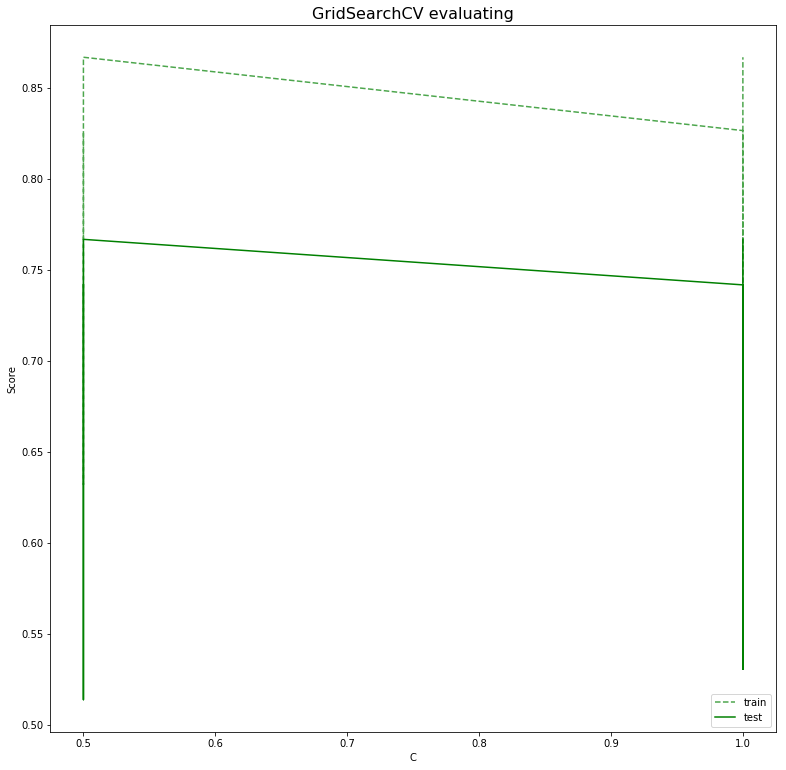

In [135]:
plt.figure(figsize=(13, 13))
plt.title("GridSearchCV evaluating",
          fontsize=16)

plt.xlabel("C")
plt.ylabel("Score")

ax = plt.gca()
# ax.set_xlim(0, 402)
# ax.set_ylim(0.73, 1)

# Get the regular numpy array from the MaskedArray
# X_axis = np.array(str(results['params']), dtype=float)
# d['value'] for d in l]
res = [d['C'] for d in results['params']]
print(res)
X_axis = np.array([d['C'] for d in results['params']], dtype=float)

for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = results['mean_%s_score' % (sample)]
        sample_score_std = results['std_%s_score' % (sample)]
  
        ax.plot(X_axis, sample_score_mean, style, color=color, alpha=1 if sample == 'test' else 0.7, 
               label=sample)

# for color in ['g', 'k']:
#     for sample, style in (('train', '--'), ('test', '-')):
#         sample_score_mean = results['mean_%s_score' % (sample)]
#         sample_score_std = results['std_%s_score' % (sample)]
        
# #     for sample, style in (('train', '--'), ('test', '-')):
# #         sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
# #         sample_score_std = results['std_%s_%s' % (sample, scorer)]
#         ax.fill_between(X_axis, sample_score_mean - sample_score_std,
#                         sample_score_mean + sample_score_std,
#                         alpha=0.1 if sample == 'test' else 0, color=color)
       

#         best_index = np.nonzero([d['C'] for d in results['params']] == 1)[0][0]
#         best_score = results['mean_test'][best_index]

#     #     # Plot a dotted vertical line at the best score for that scorer marked by x
#         ax.plot([X_axis[best_index], ] * 2, [0, best_score],
#                 linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

#     #     # Annotate the best score for that scorer
#         ax.annotate("%0.2f" % best_score,
#                     (X_axis[best_index], best_score + 0.005))

# TODO: plot for each parameter and only best results
plt.legend(loc="best")
# plt.grid('off')
plt.show()


## Using PCA

### Transform data to array

In [137]:
X_train = X_train.toarray()

In [139]:
X_test = X_test.toarray()

### Apply PCA 

In [162]:
from sklearn.decomposition import PCA

def applyPCA(X):
    # pca = PCA(n_components=2, svd_solver='full')
#     pca = PCA(n_components=2)
    X = pca.fit_transform(X)
    print(pca.singular_values_) 
    return X

In [163]:
X_train_PCA = applyPCA(X_train)

[2.69551919 1.65495605]


In [164]:
print(X_train_PCA)

[[-9.62527173e-02  6.07926508e-02]
 [-2.06073572e-02 -7.61445839e-03]
 [-6.50050715e-02 -2.44645195e-02]
 [-1.36768050e-01  8.58744535e-02]
 [ 1.83588018e-01 -8.93260547e-02]
 [ 2.76088323e-01  6.44994384e-02]
 [ 9.15958934e-02  8.51522843e-02]
 [ 1.30917201e-01 -2.03718591e-02]
 [-4.58049553e-02 -1.04540520e-01]
 [ 1.46219600e-01  2.04532987e-01]
 [-5.96043860e-03  1.36199525e-01]
 [-6.85236588e-02 -5.83742555e-02]
 [-1.28325016e-01  7.58788048e-03]
 [ 1.72380273e-01  1.12971674e-01]
 [ 2.54265371e-01  1.38166827e-01]
 [ 9.51698281e-04  6.31944468e-02]
 [-1.90155051e-01 -5.61116793e-02]
 [ 6.43461760e-02  1.55212475e-01]
 [ 3.68407381e-02  4.49053703e-02]
 [-8.54082525e-02  6.55551966e-02]
 [-1.99349093e-01 -9.39238703e-02]
 [ 4.46949210e-02  7.30707350e-02]
 [-9.63147498e-02 -2.20838883e-02]
 [-2.51908763e-01 -1.27845613e-02]
 [-1.56053133e-01  6.65950015e-02]
 [-6.27448907e-02  1.05754065e-01]
 [ 2.16820287e-01 -1.42241009e-01]
 [ 9.11607800e-02  2.43554763e-02]
 [ 1.06453703e-01  9

In [165]:
X_test_PCA = applyPCA(X_test)

[0.91721504 0.57428453]


In [146]:
# print(X_test_PCA, y_test_PCA)

[[0.         0.00039963 0.         ... 0.         0.         0.        ]
 [0.         0.00168559 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0134586  0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]] [ 9  0  6 18  3 14  5  2 16  1  2 13  4 12  3 16  4 19  6 18 11  9  0  7
 15 15  5 13  8  8  7 17 14 19 10 17 11 10  1 12]


#### Plot

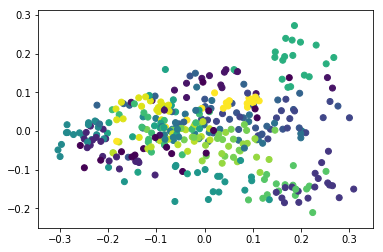

In [168]:
plt.scatter(X_train_PCA[:,0], X_train_PCA[:,1], c=y_train)


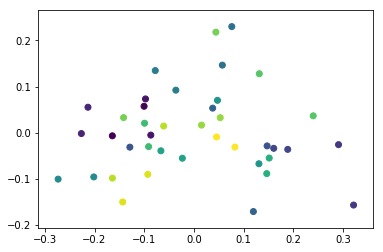

In [169]:
plt.scatter(X_test_PCA[:,0], X_test_PCA[:,1], c=y_test)


### Apply TSNE

In [172]:
from sklearn.manifold import TSNE

def applyTSNE(X):
    X = TSNE(n_components=2).fit_transform(X)
    return X

In [174]:
X_train_TSNE = applyTSNE(X_train)
X_test_TSNE = applyTSNE(X_test)

**Plot:**

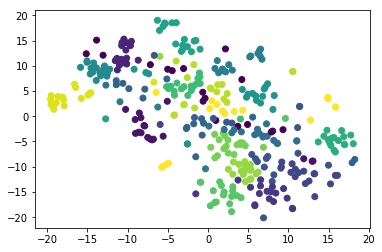

In [175]:
plt.scatter(X_train_TSNE[:,0], X_train_TSNE[:,1], c=y_train)

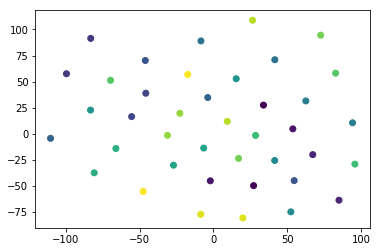

In [176]:
plt.scatter(X_test_TSNE[:,0], X_test_TSNE[:,1], c=y_test)

## TODO: train with PCA and show results (use functions where possible)

In [181]:
grid_search = trainSVM(X_train_PCA, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] C=0.5, gamma=auto, kernel=linear ................................
[CV] .... C=0.5, gamma=auto, kernel=linear, score=0.375, total=   0.0s
[CV] C=0.5, gamma=auto, kernel=linear ................................
[CV] .... C=0.5, gamma=auto, kernel=linear, score=0.425, total=   0.0s
[CV] C=0.5, gamma=auto, kernel=linear ................................
[CV]  C=0.5, gamma=auto, kernel=linear, score=0.30833333333333335, total=   0.0s
[CV] C=0.5, gamma=auto, kernel=poly ..................................
[CV]  C=0.5, gamma=auto, kernel=poly, score=0.21666666666666667, total=   0.0s
[CV] C=0.5, gamma=auto, kernel=poly ..................................
[CV] ........ C=0.5, gamma=auto, kernel=poly, score=0.2, total=   0.0s
[CV] C=0.5, gamma=auto, kernel=poly ..................................
[CV]  C=0.5, gamma=auto, kernel=poly, score=0.2833333333333333, total=   0.0s
[CV] C=0.5, gamma=scale, kernel=linear ........................

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ... C=0.5, gamma=scale, kernel=linear, score=0.425, total=   0.0s
[CV] C=0.5, gamma=scale, kernel=linear ...............................
[CV]  C=0.5, gamma=scale, kernel=linear, score=0.30833333333333335, total=   0.0s
[CV] C=0.5, gamma=scale, kernel=poly .................................
[CV]  C=0.5, gamma=scale, kernel=poly, score=0.21666666666666667, total=   0.0s
[CV] C=0.5, gamma=scale, kernel=poly .................................
[CV] ....... C=0.5, gamma=scale, kernel=poly, score=0.2, total=   0.0s
[CV] C=0.5, gamma=scale, kernel=poly .................................
[CV]  C=0.5, gamma=scale, kernel=poly, score=0.2833333333333333, total=   0.0s
[CV] C=1, gamma=auto, kernel=linear ..................................
[CV] ...... C=1, gamma=auto, kernel=linear, score=0.375, total=   0.0s
[CV] C=1, gamma=auto, kernel=linear ..................................
[CV] ...... C=1, gamma=auto, kernel=linear, score=0.425, total=   0.0s
[CV] C=1, gamma=auto, kernel=linear .............

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.5s finished


In [183]:
results = grid_search.cv_results_
print(results)

{'mean_fit_time': array([0.01300097, 0.00906046, 0.01019216, 0.00945441, 0.00839082,
       0.01157204, 0.00814064, 0.01032241]), 'std_fit_time': array([3.56137767e-03, 5.43194525e-05, 1.45544017e-03, 2.91897723e-04,
       4.12594233e-04, 3.15893648e-03, 1.05229029e-04, 5.45023840e-04]), 'mean_score_time': array([0.00374746, 0.00464392, 0.00563677, 0.00325267, 0.00286945,
       0.00318416, 0.00286659, 0.00313457]), 'std_score_time': array([9.91848875e-04, 2.05975837e-03, 3.08673618e-03, 6.05790703e-05,
       1.30708092e-05, 4.97346464e-05, 9.15215470e-06, 1.07947608e-04]), 'param_C': masked_array(data=[0.5, 0.5, 0.5, 0.5, 1, 1, 1, 1],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=['auto', 'auto', 'scale', 'scale', 'auto', 'auto',
                   'scale', 'scale'],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
       

In [186]:
dispResults(results)

*** {'C': 0.5, 'gamma': 'auto', 'kernel': 'linear'} ***
{'C': 0.5, 'gamma': 'auto', 'kernel': 'poly'}
{'C': 0.5, 'gamma': 'scale', 'kernel': 'linear'}
{'C': 0.5, 'gamma': 'scale', 'kernel': 'poly'}
{'C': 1, 'gamma': 'auto', 'kernel': 'linear'}
{'C': 1, 'gamma': 'auto', 'kernel': 'poly'}
{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
{'C': 1, 'gamma': 'scale', 'kernel': 'poly'}


Nr,Parameters,Score mean (MSE),Score std (Variance)
1,"{'C': 0.5, 'gamma': 'auto', 'kernel': 'linear'}",0.36944444444444446,0.047790695928014576
2,"{'C': 0.5, 'gamma': 'auto', 'kernel': 'poly'}",0.23333333333333334,0.036004114991154766
3,"{'C': 0.5, 'gamma': 'scale', 'kernel': 'linear'}",0.36944444444444446,0.047790695928014576
4,"{'C': 0.5, 'gamma': 'scale', 'kernel': 'poly'}",0.23333333333333334,0.036004114991154766
5,"{'C': 1, 'gamma': 'auto', 'kernel': 'linear'}",0.36944444444444446,0.047790695928014576
6,"{'C': 1, 'gamma': 'auto', 'kernel': 'poly'}",0.23333333333333334,0.036004114991154766
7,"{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}",0.36944444444444446,0.047790695928014576
8,"{'C': 1, 'gamma': 'scale', 'kernel': 'poly'}",0.23333333333333334,0.036004114991154766


### Conclusions

**TODO**
+ in 2 dim e mai prost
+ timp de antrenare - mult mai 

**TODO:** train PCA with more dimensions? Gasit greseala / de ce 2 dim nu e ok?

## Task 2: Text clustering

**TODO:** Does  the  clustering  gives  you  back  the  books  clustered  by  author?Are  the  books  grouped  differently?  Can  you  find  what  authors  have  similar  writing  styles?Or  are  the  books  grouped  by  genre? 

Unsupervised learning => will need to find something in the dataset and explain what found

**TODO:**
- DBCAN ( *eps*  and  *minsamples* hyperparams)
- KMeans ( *nclusters*  and  *init* hyperparams)
- Hierarchical(Agglomerative)  ( *nclusters* hyperparams)

- compare + metrics:
    *  *silhouette  score*
    * *homogeneityscore*
    * *completness  score*. 

### Set scores

In [192]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer, silhouette_score, homogeneity_score, completeness_score

scoring = {
    'silhouette_score': make_scorer(silhouette_score),
#     TODO: labels_true, labels_pred
#     'homogeneity_score': make_scorer(homogeneity_score),
#     'completeness_score': make_scorer(completeness_score)
};
# scoring = ['silhouette_score', 'homogeneity_score', 'completeness_score']

In [ ]:

# grid_search = GridSearchCV(cl, param_grid=hyperparams, cv=3, verbose=3, 
#                            return_train_score=True, scoring=scoring, refit="silhouette_score")


### Set hyperparameters

In [188]:
hyperparams = [
    {
        "eps": [0.5, 1, 2, 3],
        "min_samples": [3,5,10],
    }, #DBSCAN
    {
        "n_clusters": [3, 10, 20],
        "init": ["k-means++", "random" ],
    }, #KMeans
    {
        "n_clusters": [3, 4, 10, 20],
    }, #Agglomerative
]

In [193]:
# TODO : Use the following algorithms to perform clustering on the dataset  
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score


# X = X.toarray()
# print(X)
# X = X.toarray()
# print(X)


# TODO: setat parametri entru KMeans si Agglomerative - sa clasifice in 3 clustere

algorithms = [DBSCAN, KMeans, AgglomerativeClustering]
# algorithms = [DBSCAN, KMeans]
# algorithms = [DBSCAN]

for i, Algorithm in enumerate(algorithms):
    print(Algorithm)
    cl = Algorithm()
    
    grid_search = GridSearchCV(cl, param_grid=hyperparams, cv=3, verbose=3, 
                           return_train_score=True, scoring=scoring, refit="silhouette_score")

    print(grid_search.fit(X_train))
#     print(grid_search.fit(X_train, y_train))
    results = grid_search.cv_results_
    print(results)
    
    dispResults(results)
    
#     y_pred = cl.labels_
    
#     ss = silhouette_score(X, y_pred)
#     print("Silhuette score:", ss)

#     ar = adjusted_rand_score(y, y_pred)
#     print("Adjusted rand score:", ar)
    
#     hs = homogeneity_score(y, y_pred)
#     print("Homogenity score:", hs)
    
#     cs = completeness_score(y, y_pred)
#     print("Completeness score:", cs)
    
#     print(Algorithm.__name__, ar)



<class 'sklearn.cluster.dbscan_.DBSCAN'>
Fitting 3 folds for each of 22 candidates, totalling 66 fits
[CV] eps=0.5, min_samples=3 ..........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


MemoryError: 

## Bonus

 For  using  clustering  and  dimensionality  reduction  techniqueson  your  first  homework  dataset